# Predicting Death Risk for Patients with Heart Failure 

Background: Heart failure is a chronic condition that affects millions of people worldwide. Patients with heart failure are at increased risk of mortality. Predicting the likelihood of death can help healthcare providers intervene early and save lives. 

# Objective

The objective of this project is to develop a machine learning model that can predict the risk of death for patients with heart failure.

# Dataset
"Heart Failure Clinical Data"

https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

This dataset is a collection of clinical data related to heart failure patients. It contains information about 299 patients who had heart failure, and includes clinical features that may be relevant for predicting mortality in such patients.

The 13 features in the dataset are:

age - age of the patient (years)

anaemia - whether or not the patient has anemia (boolean)

creatinine_phosphokinase - level of the CPK enzyme in the blood (mcg/L)

diabetes - whether or not the patient has diabetes (boolean)

ejection_fraction - percentage of blood leaving the heart at each contraction (%)

high_blood_pressure - whether or not the patient has high blood pressure (boolean)

platelets - level of platelets in the blood (kiloplatelets/mL)

serum_creatinine - level of creatinine in the blood (mg/dL)

serum_sodium - level of sodium in the blood (mEq/L)

sex - gender of the patient (binary: male or female)

smoking - whether or not the patient smokes (boolean)

time - follow-up period (days)

DEATH_EVENT - whether or not the patient died during the follow-up period (boolean)

## Categorical Variables

anaemia: whether the patient has low red blood cell counts or not (0 = no, 1 = yes)
   
diabetes: whether the patient has diabetes or not (0 = no, 1 = yes)

high_blood_pressure: whether the patient has high blood pressure or not (0 = no, 1 = yes)

sex: gender of the patient (0 = female, 1 = male)

smoking: whether the patient smokes or not (0 = no, 1 = yes)

DEATH_EVENT: whether the patient died during the follow-up period or not (0 = no, 1 = yes)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataH=pd.read_csv('heart_failure_clinical_records_dataset.csv')
dataH.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


#  Data Cleaning and Preparation

In [3]:
#copying dataset to save original data
data=dataH.copy()

In [4]:
# verifying if there are any missing values

missing_values = data.isnull().sum()
missing_values 


#No missing values in the data

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# Scaling the Data
Scaling the data is an essential preprocessing step in machine learning. It helps to normalize the features' values, making them more comparable and improving the performance of algorithms.

In [5]:
#Shapiro-Wilk test: to determine if data is normally distributed
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test
stat, p = shapiro(data)

# Interpret the result
alpha = 0.05
if p > alpha:
    print('Data is normally distributed')
else:
    print('Data is not normally distributed')

Data is not normally distributed


Since the data is not normally distributed, it's not a good idea to use standard scaling methods that assume a normal distribution. In such cases, use scaling methods that are more robust to non-normality.
RobustScaler: This method scales the data using the median and interquartile range (IQR) instead of the mean and standard deviation. This scaling method is not affected by outliers and can handle non-normal data.

In [6]:
from sklearn.preprocessing import RobustScaler

# Create an instance of the scaler
scaler = RobustScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(data)

In the "heart-failure-clinical-data" dataset, the categorical variables have already been encoded with binary values (0 or 1), indicating the absence or presence of a particular characteristic. Therefore, it is not needed to perform any additional encoding on these variables before using them for machine learning models.

# Exploratory Data Analysis (EDA)
Conducting exploratory data analysis to gain insights into the dataset, identifying relationships between variables and visualizing trends and patterns.

In [7]:
#displaying the first 5 rows
data.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [8]:
#checking the shape
data.shape

(299, 13)

The data contain information on 299 patients with heart failure, including their medical history, demographics, and various clinical features (299 rows, 13 columns).

In [9]:
#Summary Statistics
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [10]:
#Data Types
data.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

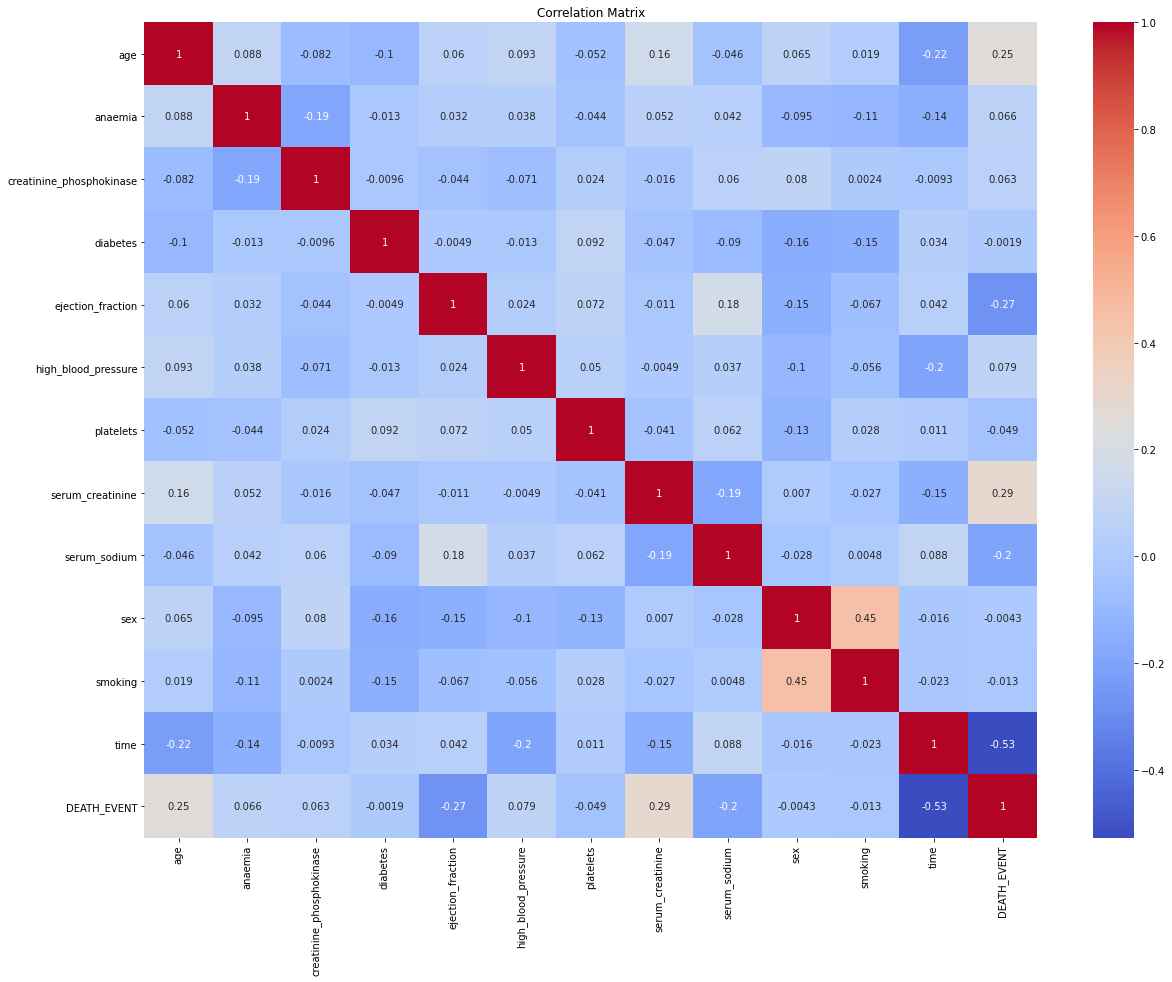

In [11]:
# Create a correlation matrix of the dataset
corr_matrix = data.corr()

# Set up the figure size
fig, ax = plt.subplots(figsize=(20,15))

# Create the heatmap plot
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)

# Set the plot title
ax.set_title('Correlation Matrix')

# Show the plot
plt.show()


Looking at the correlation matrix, the variables with the highest correlation with the DEATH_EVENT are:

* serum_creatinine: The correlation coefficient between DEATH_EVENT and serum_creatinine is 0.29, which indicates a moderate positive correlation. This means that as the level of serum creatinine increases, the likelihood of death during the follow-up period also increases.


* age: The correlation coefficient between DEATH_EVENT and age is 0.25, which indicates a weak positive correlation. This suggests that as the age of the patient increases, the likelihood of death during the follow-up period also increases.

Other variables that have moderate correlation coefficients with DEATH_EVENT include:

* ejection_fraction: The correlation coefficient between DEATH_EVENT and ejection_fraction is -0.27, indicating a moderate negative correlation. This suggests that as the ejection fraction decreases, the likelihood of death during the follow-up period increases.


* serum_sodium: The correlation coefficient between DEATH_EVENT and serum_sodium is -0.2, indicating a weak negative correlation. This suggests that as the level of serum sodium decreases, the likelihood of death during the follow-up period increases.


* time: The correlation coefficient between DEATH_EVENT and time is -0.53, which indicates a strong negative correlation. This means that as the time passes, the likelihood of death during the follow-up period decreases.

It's important to note that correlation does not necessarily imply causation.

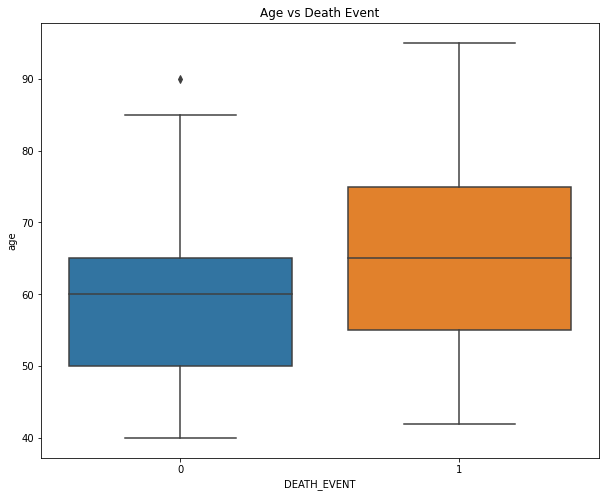

In [12]:
# Visualizing the relationship between age and death
#Boxplot
plt.figure(figsize=(10, 8))
sns.boxplot(x='DEATH_EVENT', y='age', data=data)
plt.title('Age vs Death Event')
plt.show()

By examining the boxplot, we notice that the median age for patients who died during the follow-up period (DEATH_EVENT = 1) is higher than the median age for patients who survived (DEATH_EVENT = 0). This suggests that age may be a risk factor for death during the follow-up period. However, it's important to realize that age is just one of many factors that can contribute to the likelihood of death and more detailed analysis would be needed.

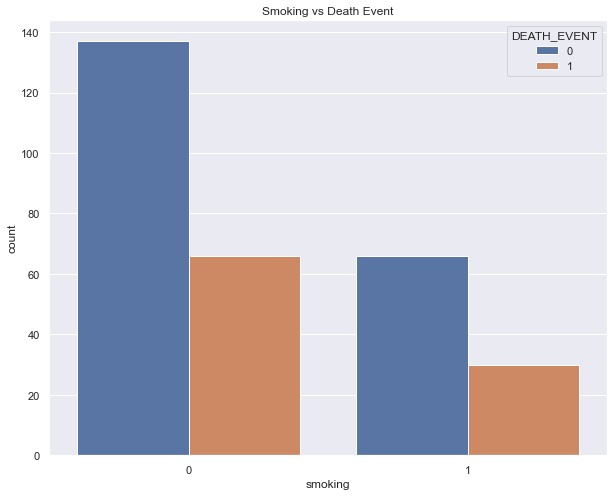

In [13]:
# Visualizing the relationship between smoking and death
#Countplot
plt.figure(figsize=(10, 8))
sns.set(style='darkgrid')
sns.countplot(x='smoking', hue='DEATH_EVENT', data=data)
plt.title('Smoking vs Death Event')
plt.show()


The countplot of smoking versus death_event could help investigate whether smoking is associated with an increased risk of death from heart failure.
From the plot, we can observe that non-smokers have a higher survival rate than smokers, or that smoking is associated with an increased risk of death from heart failure. It's important to note that this plot only shows associations and does not necessarily imply causation.

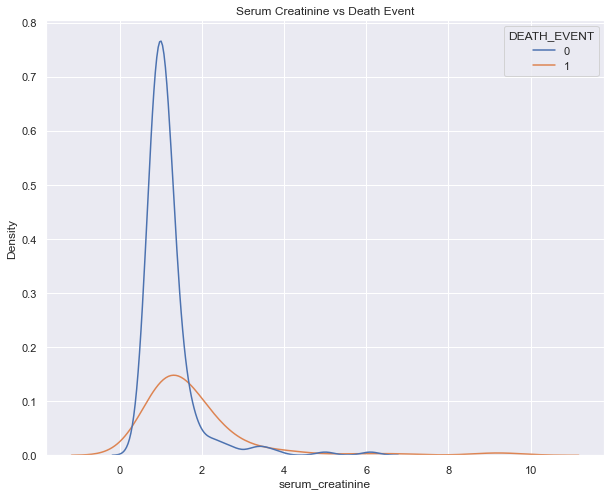

In [14]:
# Visualize the relationship between serum creatinine and death event
#kernel density plot
plt.figure(figsize=(10, 8))
sns.set(style='darkgrid')
sns.kdeplot(x='serum_creatinine', hue='DEATH_EVENT', data=data)
plt.title('Serum Creatinine vs Death Event')
plt.show()

From the plot, we can observe the distribution of serum creatinine levels for patients who survived and those who died. We could conclude that patients who died during the follow-up period had higher serum creatinine levels on average compared to those who survived. Again it's important to note that this plot only shows associations and does not necessarily imply causation.

# Feature Engineering
Create new features from the existing data to improve machine learning model's accuracy.


# Age Group
Instead of using age as a continuous variable, we group patients into smaller number of discrete bins to capture potential age-related effects that may not be captured by treating age as a continuous variable. This can help to reduce noise in the data and capture non-linear relationships between the predictor variable and the response variable.

In [15]:
bins = [17, 40, 60, 80, float('inf')]
labels=['18-40 years', '41-60 years', '61-80 years', 'Above 80 years']



# Create a new column that represents the age groups
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels)

data.head(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,61-80 years
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,41-60 years
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,61-80 years
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,41-60 years
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,61-80 years
5,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1,Above 80 years
6,75.0,1,246,0,15,0,127000.00,1.2,137,1,0,10,1,61-80 years
7,60.0,1,315,1,60,0,454000.00,1.1,131,1,1,10,1,41-60 years
8,65.0,0,157,0,65,0,263358.03,1.5,138,0,0,10,1,61-80 years
9,80.0,1,123,0,35,1,388000.00,9.4,133,1,1,10,1,61-80 years


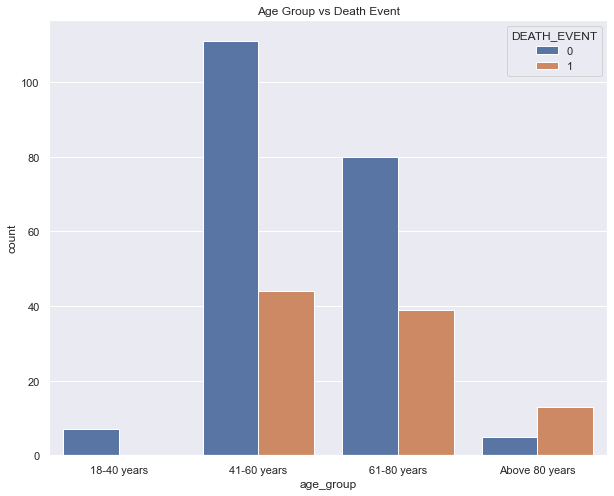

In [16]:
# Visualizing the relationship between age groups and death 
new_data = data[['age_group', 'DEATH_EVENT']]

#Countplot
plt.figure(figsize=(10, 8))
sns.set(style='darkgrid')
sns.countplot(x='age_group', hue='DEATH_EVENT', data=new_data)
plt.title('Age Group vs Death Event')
plt.show()

# Anaemia_Diabetes Interaction
Creating a new binary variable by multiplying the anaemia and diabetes columns. Since both anaemia and diabetes are binary variables, the resulting anaemia_diabetes_interaction variable will also be binary and will indicate whether a patient has both anemia and diabetes (1) or not (0).

The resulting anaemia_diabetes_interaction variable can be used as a predictor in machine learning models to potentially improve the accuracy of predictions. As with any new feature, it's important to carefully validate its usefulness and avoid overfitting to the training data.

In [17]:
# Creating a new binary variable that indicates whether a patient has both anemia and diabetes
# Patients with both anemia and diabetes may have a higher risk of heart failure 
#than those with only one of these conditions

data['anaemia_diabetes_interaction'] = data['anaemia'] * data['diabetes']

data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,anaemia_diabetes_interaction
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,61-80 years,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,41-60 years,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,61-80 years,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,41-60 years,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,61-80 years,1


In [18]:
# Count how many patients have anaemia_diabetes_interaction == 1
count = data['anaemia_diabetes_interaction'].sum()
count

53

# Creatinine Level to Ejection Fraction Ratio
The ratio of a patient's creatinine level to their ejection fraction may provide additional information about their cardiovascular health.
Creating a new feature that represents this ratio.

In [19]:
data['ratio_creat_ef']= data['serum_creatinine']/data['ejection_fraction']
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,anaemia_diabetes_interaction,ratio_creat_ef
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,61-80 years,0,0.095000
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,41-60 years,0,0.028947


The creatinine to ejection fraction (EF) ratio is not a widely studied or clinically validated measure in the context of heart failure. However, both serum creatinine and EF are important indicators of heart function, and their ratio could potentially provide additional information about a patient's condition.

Serum creatinine is a marker of kidney function and is often used to assess the severity of kidney disease in patients with heart failure. Elevated levels of serum creatinine may indicate reduced kidney function, which can be a complication of heart failure.

EF, on the other hand, is a measure of how well the heart is able to pump blood. It represents the percentage of blood that is pumped out of the left ventricle with each contraction. A normal EF is typically between 50-70%, while a reduced EF (below 50%) is a common characteristic of heart failure.

The creatinine to EF ratio could potentially provide additional information about the interaction between kidney function and heart function. However, more research is needed to validate the clinical utility of this measure.

Any new feature created from data should be carefully evaluated and validated before being used as a predictor in machine learning models to ensure that it is biologically meaningful/ clinically relevant and not overfitting to the training data. 


# Platelets to Serum Creatinine Ratio
A higher ratio of platelets to serum creatinine may be associated with better outcomes in heart failure patients. Creating a new feature that represents this ratio.

In [20]:
data['ratio_plat_creat']= data['platelets']/data['serum_creatinine']
data.head(2)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_group,anaemia_diabetes_interaction,ratio_creat_ef,ratio_plat_creat
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,61-80 years,0,0.095000,139473.684211
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,41-60 years,0,0.028947,239416.390909


The resulting platelets_creatinine_ratio variable can be used as a predictor in machine learning models to potentially improve the accuracy of predictions for heart failure outcome.
The platelets to serum creatinine ratio is not a widely studied or clinically validated measure in the context of heart failure. However, both platelet count and serum creatinine are important clinical indicators that may be useful in assessing the severity of heart failure.

Elevated platelet counts (thrombocytosis) are sometimes observed in heart failure patients.
Serum creatinine is a marker of kidney function and is often used to assess the severity of kidney disease in heart failure patients.

The platelets to serum creatinine ratio could potentially provide additional information about the interaction between these two factors. 

# Model selection and training
The process of model selection and training involves choosing appropriate algorithms, splitting the dataset into training and testing sets, training the models on the training set, evaluating the models on the testing set, comparing their performance, fine-tuning the best-performing model, and evaluating the final model. 

After binning the age variable, we need to encode the age groups using one-hot encoding before training the machine learning model. 

In [21]:
#Encoding the categorical variable 'age_group' into numerical values
#performing one-hot encoding on a categorical variable,  using the get_dummies()

# One-hot-encode the age_group column
age_group_encoded = pd.get_dummies(data['age_group'], prefix='age_group')

# Concatenate the encoded column with the original dataset
data_encoded = pd.concat([data, age_group_encoded], axis=1).drop(['age_group'], axis=1)
data_encoded

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,anaemia_diabetes_interaction,ratio_creat_ef,ratio_plat_creat,age_group_18-40 years,age_group_41-60 years,age_group_61-80 years,age_group_Above 80 years
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,0,0.095000,139473.684211,0,0,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,0.028947,239416.390909,0,1,0,0
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,0,0.065000,124615.384615,0,0,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,0.095000,110526.315789,0,1,0,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1,0.135000,121111.111111,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0,0,0.028947,140909.090909,0,0,1,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0,0,0.031579,225000.000000,0,1,0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0,0,0.013333,927500.000000,0,1,0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0,0,0.036842,100000.000000,0,1,0,0


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Preparing the data for machine learning
X = data_encoded.drop(['DEATH_EVENT'], axis=1)
y = data_encoded['DEATH_EVENT'] 

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [23]:


# Defining the hyperparameters for each model
param_grid_rf = {'n_estimators': [100, 500, 1000],
                 'max_depth': [5, 10, 20, None]}
param_grid_lr = {'C': [0.1, 1, 10, 100]}
param_grid_svc = {'C': [0.1, 1, 10, 100],
                  'gamma': [0.1, 1, 10, 100]}
param_grid_nn = {'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
                 'alpha': [0.0001, 0.001, 0.01]}

# Initializing the models
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)
svc = SVC(random_state=42)
nn = MLPClassifier(random_state=42)

# Performing a grid search with cross-validation for each model
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_nn = GridSearchCV(nn, param_grid_nn, cv=5, n_jobs=-1, scoring='accuracy')

# Training the models on the training set
grid_search_rf.fit(X_train, y_train)
grid_search_lr.fit(X_train, y_train)
grid_search_svc.fit(X_train, y_train)
grid_search_nn.fit(X_train, y_train)

# Printing the best hyperparameters for each model
print("Random Forest: Best hyperparameters:", grid_search_rf.best_params_)
print()
print("Logistic Regression: Best hyperparameters:", grid_search_lr.best_params_)
print()
print("Support Vector Machine: Best hyperparameters:", grid_search_svc.best_params_)
print()
print("Neural Network: Best hyperparameters:", grid_search_nn.best_params_)

Random Forest: Best hyperparameters: {'max_depth': 10, 'n_estimators': 100}

Logistic Regression: Best hyperparameters: {'C': 0.1}

Support Vector Machine: Best hyperparameters: {'C': 0.1, 'gamma': 0.1}

Neural Network: Best hyperparameters: {'alpha': 0.0001, 'hidden_layer_sizes': (100, 100)}




Now we evaluate the performance of each algorithm using metrics such as accuracy, precision, recall, F1 score, and AUC-ROC, and choose the one that performs best.


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Training the models on the training set
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
svc.fit(X_train, y_train)
nn.fit(X_train, y_train)

# Making predictions on the test set
rf_preds = rf.predict(X_test)
lr_preds = lr.predict(X_test)
svc_preds = svc.predict(X_test)
nn_preds = nn.predict(X_test)

# Calculating and print evaluation metrics
rf_acc = accuracy_score(y_test, rf_preds)
rf_prec = precision_score(y_test, rf_preds)
rf_rec = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
rf_auc = roc_auc_score(y_test, rf_preds)

lr_acc = accuracy_score(y_test, lr_preds)
lr_prec = precision_score(y_test, lr_preds)
lr_rec = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
lr_auc = roc_auc_score(y_test, lr_preds)

svc_acc = accuracy_score(y_test, svc_preds)
svc_prec = precision_score(y_test, svc_preds)
svc_rec = recall_score(y_test, svc_preds)
svc_f1 = f1_score(y_test, svc_preds)
svc_auc = roc_auc_score(y_test, svc_preds)

nn_acc = accuracy_score(y_test, nn_preds)
nn_prec = precision_score(y_test, nn_preds)
nn_rec = recall_score(y_test, nn_preds)
nn_f1 = f1_score(y_test, nn_preds)
nn_auc = roc_auc_score(y_test, nn_preds)

print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC-ROC: {:.4f}".format(rf_acc, rf_prec, rf_rec, rf_f1, rf_auc))
print()
print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC-ROC: {:.4f}".format(lr_acc, lr_prec, lr_rec, lr_f1, lr_auc))
print()
print("Support Vector Machine - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC-ROC: {:.4f}".format(svc_acc, svc_prec, svc_rec, svc_f1, svc_auc))
print()
print("Neural Network - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1-Score: {:.4f}, AUC-ROC: {:.4f}".format(nn_acc, nn_prec, nn_rec, nn_f1, nn_auc))

# Choosing the best algorithm based on evaluation metrics
best_acc = max(rf_acc, lr_acc, svc_acc, nn_acc)
best_prec = max(rf_prec, lr_prec, svc_prec, nn_prec)
best_rec = max(rf_rec, lr_rec, svc_rec, nn_rec)
best_f1 = max(rf_f1, lr_f1, svc_f1, nn_f1)
best_auc = max(rf_auc, lr_auc, svc_auc, nn_auc)

print("\nBest Algorithm based on Evaluation Metrics:")
if best_acc == rf_acc:
    print("Random Forest")
elif best_acc == lr_acc:
    print("Logistic Regression")
elif best_acc == svc_acc:
    print("Support Vector Machine")
else:
    print("Neural Network")


Random Forest - Accuracy: 0.7333, Precision: 0.7143, Recall: 0.6000, F1-Score: 0.6522, AUC-ROC: 0.7143

Logistic Regression - Accuracy: 0.7167, Precision: 0.7500, Recall: 0.4800, F1-Score: 0.5854, AUC-ROC: 0.6829

Support Vector Machine - Accuracy: 0.5833, Precision: 0.5000, Recall: 0.0400, F1-Score: 0.0741, AUC-ROC: 0.5057

Neural Network - Accuracy: 0.6500, Precision: 0.6429, Recall: 0.3600, F1-Score: 0.4615, AUC-ROC: 0.6086

Best Algorithm based on Evaluation Metrics:
Random Forest


## New Data

Creating a dataframe of new data that contains the same columns as the training data (X_train). 

In [25]:
new_data = pd.DataFrame({
    'age': [65, 50, 80, 55, 48, 92],
    'anaemia': [0, 1, 1, 0, 0, 1],
    'creatinine_phosphokinase': [580, 200, 450, 580, 200, 450],
    'diabetes': [0, 1, 0, 0, 1, 1],
    'ejection_fraction': [35, 40, 25, 35, 40, 25],
    'high_blood_pressure': [1, 0, 1, 0, 0,1],
    'platelets': [265000, 162000, 450000, 265000, 162000, 450000],
    'serum_creatinine': [1.9, 1.1, 3.5, 1.9, 1.1, 3.5],
    'serum_sodium': [135, 138, 120, 125, 137, 129],
    'sex': [1, 0, 1, 1, 0, 0],
    'smoking':[1,0, 0, 0, 1, 1],
    'time':[123, 167, 220, 67, 92, 158],
    'anaemia_diabetes_interaction':[0, 1, 0, 0, 0,1],
    'ratio_creat_ef':[0.054286,0.0275,0.14, 0.054286,0.0275,0.14],
    'ratio_plat_creat':[139473.684211,147272.727273,128571.428571,139473.684211,147272.727273,128571.428571],
    'age_group_18-40 years':[0, 0, 0, 0, 0, 0],
    'age_group_41-60 years':[0,1,0,1,1,0],
    'age_group_61-80 years':[1,0,1,0,0,0],
    'age_group_Above 80 years':[0,0,0,0,0,1]
})

new_data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,anaemia_diabetes_interaction,ratio_creat_ef,ratio_plat_creat,age_group_18-40 years,age_group_41-60 years,age_group_61-80 years,age_group_Above 80 years
0,65,0,580,0,35,1,265000,1.9,135,1,1,123,0,0.054286,139473.684211,0,0,1,0
1,50,1,200,1,40,0,162000,1.1,138,0,0,167,1,0.027500,147272.727273,0,1,0,0
2,80,1,450,0,25,1,450000,3.5,120,1,0,220,0,0.140000,128571.428571,0,0,1,0
3,55,0,580,0,35,0,265000,1.9,125,1,0,67,0,0.054286,139473.684211,0,1,0,0
4,48,0,200,1,40,0,162000,1.1,137,0,1,92,0,0.027500,147272.727273,0,1,0,0
5,92,1,450,1,25,1,450000,3.5,129,0,1,158,1,0.140000,128571.428571,0,0,0,1


In [26]:
# Using the predict() method of the trained RandomForestClassifier
#to predict the DEATH_EVENT for the new_data. 

# Loading the trained Random Forest classifier
rf = RandomForestClassifier(max_depth=10, n_estimators=100)

# Training the classifier on the training data
rf.fit(X_train, y_train)

# Predicting the DEATH_EVENT for the new data
predictions = rf.predict(new_data)

# Printing the predictions
print(predictions)


[1 0 1 1 0 1]


###### Based on the clinical data of these 6 new patients (new_data):
 
The 1st, 3rd, 4th and 6th patients have a predicted death event of 1 (predicted to experience a death event).
  
The 2nd and 5th patients have a predicted death event of 0 (predicted to not experience a death event).


These predictions are made based on the model's learned relationships between the input features (age, serum creatinine, etc.) and the target variable (death event), using the best performing Random Forest algorithm selected earlier.
